In [8]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interactive, fixed
from helper_funcs import plot_all

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
t_max = 150e-3   # second
dt = 1e-3        # second
tau = 20e-3      # second
el = -60e-3      # milivolt
vr = -70e-3      # milivolt
vth = -50e-3     # milivolt
r = 100e6        # ohm
i_mean = 25e-11  # ampere

## Coding Exercise 1: Plotting a histogram

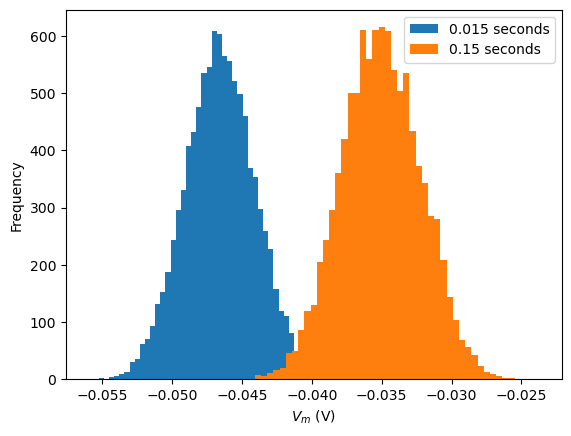

In [10]:
#################################################
## TODO for students: fill out code to plot histogram ##
# Fill out code and comment or remove the next line
# raise NotImplementedError("Student exercise: You need to plot histogram")
#################################################

# Set random number generator
np.random.seed(2020)

# Initialize t_range, step_end, n, v_n, i and nbins
t_range = np.arange(0, t_max, dt)
step_end = len(t_range)
n = 10000
v_n = el * np.ones([n, step_end])
i = i_mean * (1 + 0.1 * (t_max / dt)**(0.5) * (2 * np.random.random([n, step_end]) - 1))
nbins = 50

# Loop over time steps
for step, t in enumerate(t_range):

  # Skip first iteration
  if step==0:
    continue

  # Compute v_n
  v_n[:, step] =  v_n[:, step - 1] + (dt / tau) * (el - v_n[:, step - 1] + r * i[:, step])

# Initialize the figure
plt.figure()
plt.ylabel('Frequency')
plt.xlabel('$V_m$ (V)')

# Plot a histogram at t_max/10 (add labels and parameters histtype='stepfilled' and linewidth=0)
plt.hist(v_n[:, int(t_max/10/dt)], bins=nbins, histtype="stepfilled", linewidth=0, label=f"{t_max/10} seconds")

# Plot a histogram at t_max (add labels and parameters histtype='stepfilled' and linewidth=0)
plt.hist(v_n[:, int(t_max/dt)-1], bins=nbins, histtype="stepfilled", linewidth=0, label=f"{t_max} seconds")
# Add legend
plt.legend()
plt.show()

## Coding Exercise 2: Adding spiking to the LIF neuron

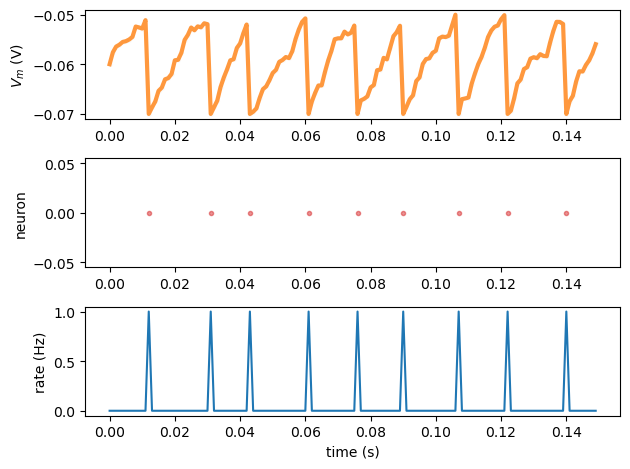

In [11]:
# Set random number generator
np.random.seed(2020)

# Initialize step_end, t_range, n, v_n and i
t_range = np.arange(0, t_max, dt)
step_end = len(t_range)
n = 1
v_n = el * np.ones([n, step_end])
i = i_mean * (1 + 0.1 * (t_max / dt)**(0.5) * (2 * np.random.random([n, step_end]) - 1))

# Initialize spikes and spikes_n
spikes = {j: [] for j in range(n)}
spikes_n = np.zeros([step_end])

#################################################
## TODO for students: add spikes to LIF neuron ##
# Fill out function and remove
# raise NotImplementedError("Student exercise: add spikes to LIF neuron")
#################################################

# Loop over time steps
for step, t in enumerate(t_range):

  # Skip first iteration
  if step == 0:
    continue

  # Compute v_n
  v_n[:, step] = v_n[:, step - 1] + (dt / tau) * (el - v_n[:, step - 1] + r*i[:, step])

  # Loop over simulations
  for j in range(n):

    # Check if voltage above threshold
    if v_n[j, step] >= vth:

      # Reset to reset voltage
      v_n[j, step] = vr

      # Add this spike time
      spikes[j] += [t]

      # Add spike count to this step
      spikes_n[step] += 1

# Collect mean Vm and mean spiking rate
v_mean = np.mean(v_n, axis=0)
spikes_mean =  spikes_n / n

# Initialize the figure
plt.figure()

# Plot simulations and sample mean
ax1 = plt.subplot(3, 1, 1)
for j in range(n):
  plt.scatter(t_range, v_n[j], color="k", marker=".", alpha=0.01)
plt.plot(t_range, v_mean, 'C1', alpha=0.8, linewidth=3)
plt.ylabel('$V_m$ (V)')

# Plot spikes
plt.subplot(3, 1, 2, sharex=ax1)
# for each neuron j: collect spike times and plot them at height j
for j in range(n):
  times = spikes[j]
  plt.scatter(times, j*np.ones_like(times), marker=".", alpha=0.5, color="tab:red")

plt.ylabel('neuron')

# Plot firing rate
plt.subplot(3, 1, 3, sharex=ax1)
plt.plot(t_range, spikes_mean)
plt.xlabel('time (s)')
plt.ylabel('rate (Hz)')

plt.tight_layout()

## Coding Exercise 3: Using Boolean indexing

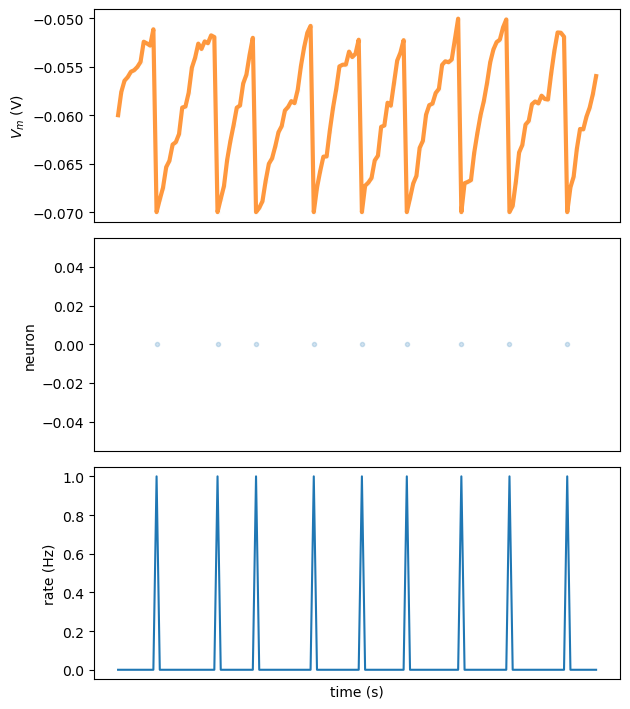

In [12]:
# Set random number generator
np.random.seed(2020)

# Initialize step_end, t_range, n, v_n and i
t_range = np.arange(0, t_max, dt)
step_end = len(t_range)
n = 1
v_n = el * np.ones([n, step_end])
i = i_mean * (1 + 0.1 * (t_max / dt)**(0.5) * (2 * np.random.random([n, step_end]) - 1))

# Initialize spikes and spikes_n
spikes = {j: [] for j in range(n)}
spikes_n = np.zeros([step_end])

#################################################
## TODO for students: use Boolean indexing ##
# Fill out function and remove
# raise NotImplementedError("Student exercise: using Boolean indexing")
#################################################

# Loop over time steps
for step, t in enumerate(t_range):

  # Skip first iteration
  if step == 0:
    continue

  # Compute v_n
  v_n[:, step] = v_n[:, step - 1] + (dt / tau) * (el - v_n[:, step - 1] + r*i[:, step])

  # Initialize boolean numpy array `spiked` with v_n > v_thr
  spiked = v_n[:, step] > vth

  # Set relevant values of v_n to resting potential using spiked
  v_n[spiked,step] = vr

  # Collect spike times
  for j in np.where(spiked)[0]:
    spikes[j] += [t]
    spikes_n[step] += 1

# Collect mean spiking rate
spikes_mean = spikes_n / n

# Plot multiple realizations of Vm, spikes and mean spike rate
plot_all(t_range, v_n, n, spikes=spikes, spikes_mean=spikes_mean)

## Coding Exercise 4: Making a binary raster plot

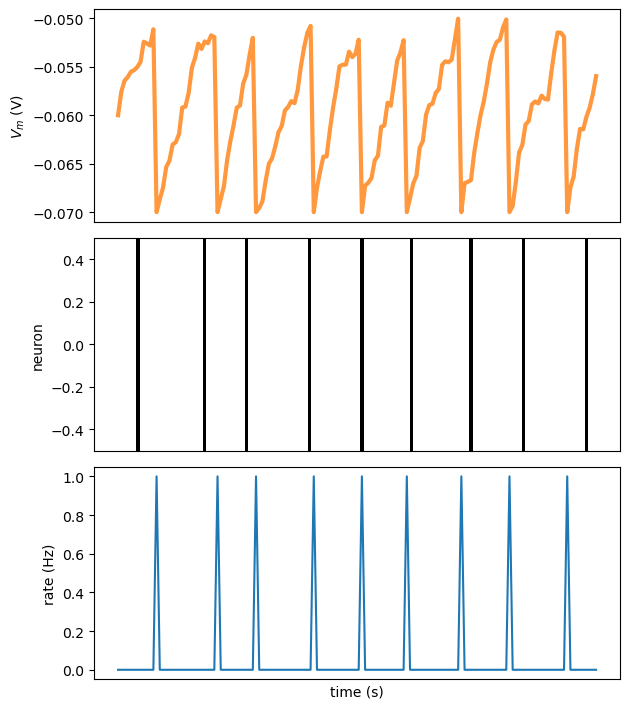

In [17]:
#################################################
## TODO for students: make a raster ##
# Fill out function and remove
# raise NotImplementedError("Student exercise: make a raster ")
#################################################

# Set random number generator
np.random.seed(2020)

# Initialize step_end, t_range, n, v_n and i
t_range = np.arange(0, t_max, dt)
step_end = len(t_range)
n = 1
v_n = el * np.ones([n, step_end])
i = i_mean * (1 + 0.1 * (t_max / dt)**(0.5) * (2 * np.random.random([n, step_end]) - 1))

# Initialize binary numpy array for raster plot
raster = np.zeros([n,step_end])

# Loop over time steps
for step, t in enumerate(t_range):

  # Skip first iteration
  if step==0:
    continue

  # Compute v_n
  v_n[:, step] = v_n[:, step - 1] + (dt / tau) * (el - v_n[:, step - 1] + r*i[:, step])

  # Initialize boolean numpy array `spiked` with v_n > v_thr
  spiked = (v_n[:,step] >= vth)

  # Set relevant values of v_n to v_reset using spiked
  v_n[spiked,step] = vr

  # Set relevant elements in raster to 1 using spiked
  raster[spiked,step] = 1

# Plot multiple realizations of Vm, spikes and mean spike rate
plot_all(t_range, v_n, n, raster)

## Coding Exercise 5: Investigating refactory periods

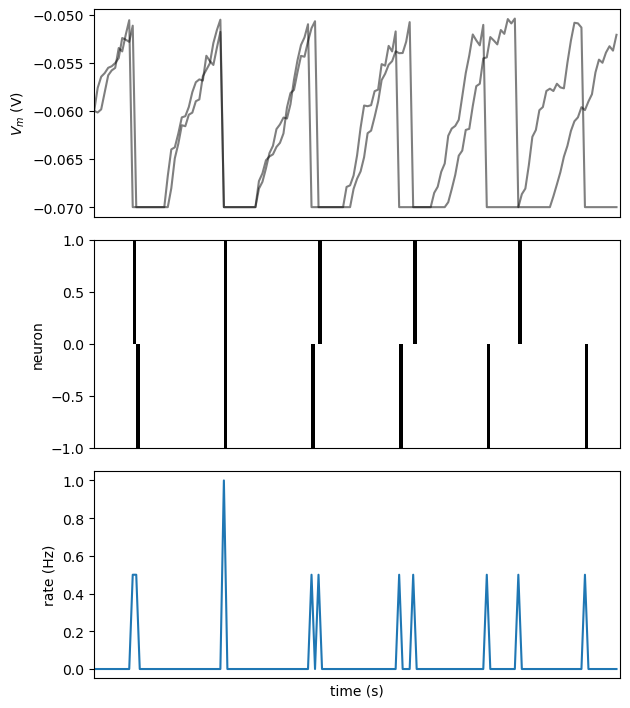

In [30]:
#################################################
## TODO for students: add refactory period ##
# Fill out function and remove
# raise NotImplementedError("Student exercise: add refactory period ")
#################################################

# Set random number generator
np.random.seed(2020)

# Initialize step_end, t_range, n, v_n and i
t_range = np.arange(0, t_max, dt)
step_end = len(t_range)
n = 2
v_n = el * np.ones([n, step_end])
i = i_mean * (1 + 0.1 * (t_max / dt)**(0.5) * (2 * np.random.random([n, step_end]) - 1))

# Initialize binary numpy array for raster plot
raster = np.zeros([n,step_end])

# Initialize t_ref and last_spike
t_ref = 0.01
last_spike = -t_ref * np.ones([n])

# Loop over time steps
for step, t in enumerate(t_range):

  # Skip first iteration
  if step == 0:
    continue

  # Compute v_n
  v_n[:, step] = v_n[:, step - 1] + (dt / tau) * (el - v_n[:, step - 1] + r*i[:, step])

  # Initialize boolean numpy array `spiked` with v_n > v_thr
  spiked = (v_n[:,step] >= vth)

  # Set relevant values of v_n to v_reset using spiked
  v_n[spiked,step] = vr

  # Set relevant elements in raster to 1 using spiked
  raster[spiked,step] = 1.

  # Initialize boolean numpy array clamped using last_spike, t and t_ref
  clamped = last_spike + t_ref > t

  # Reset clamped neurons to vr using clamped
  v_n[clamped,step] = vr

  # Update numpy array last_spike with time t for spiking neurons
  last_spike[spiked] = t

# Plot multiple realizations of Vm, spikes and mean spike rate
plot_all(t_range, v_n, n, raster)

In [26]:
raster

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.]])

In [20]:
step_end, t_max

(150, 0.15)

## Interactive demo

In [18]:
#@markdown Execute

def random_ref_period(mu, sigma):
  # set random number generator
  np.random.seed(2020)

  # initialize step_end, t_range, n, v_n, syn and raster
  t_range = np.arange(0, t_max, dt)
  step_end = len(t_range)
  n = 500
  v_n = el * np.ones([n,step_end])
  syn = i_mean * (1 + 0.1*(t_max/dt)**(0.5)*(2*np.random.random([n,step_end])-1))
  raster = np.zeros([n,step_end])

  # initialize t_ref and last_spike
  t_ref = mu + sigma*np.random.normal(size=n)
  t_ref[t_ref<0] = 0
  last_spike = -t_ref * np.ones([n])

  # loop time steps
  for step, t in enumerate(t_range):
    if step==0:
      continue

    v_n[:,step] = v_n[:,step-1] + dt/tau * (el - v_n[:,step-1] + r*syn[:,step])

    # boolean array spiked indexes neurons with v>=vth
    spiked = (v_n[:,step] >= vth)
    v_n[spiked,step] = vr
    raster[spiked,step] = 1.

    # boolean array clamped indexes refractory neurons
    clamped = (last_spike + t_ref > t)
    v_n[clamped,step] = vr
    last_spike[spiked] = t

  # plot multiple realizations of Vm, spikes and mean spike rate
  plot_all(t_range, v_n, n, raster)

  # plot histogram of t_ref
  plt.figure(figsize=(8,4))
  plt.hist(t_ref, bins=32, histtype='stepfilled', linewidth=0, color='C1')
  plt.xlabel(r'$t_{ref}$ (s)')
  plt.ylabel('count')
  plt.tight_layout()

interactive(random_ref_period, mu = (0.01, 0.05, 0.01), sigma = (0.001, 0.02, 0.001))

interactive(children=(FloatSlider(value=0.02, description='mu', max=0.05, min=0.01, step=0.01), FloatSlider(va…

## Coding Exercise 6: Rewriting code with functions

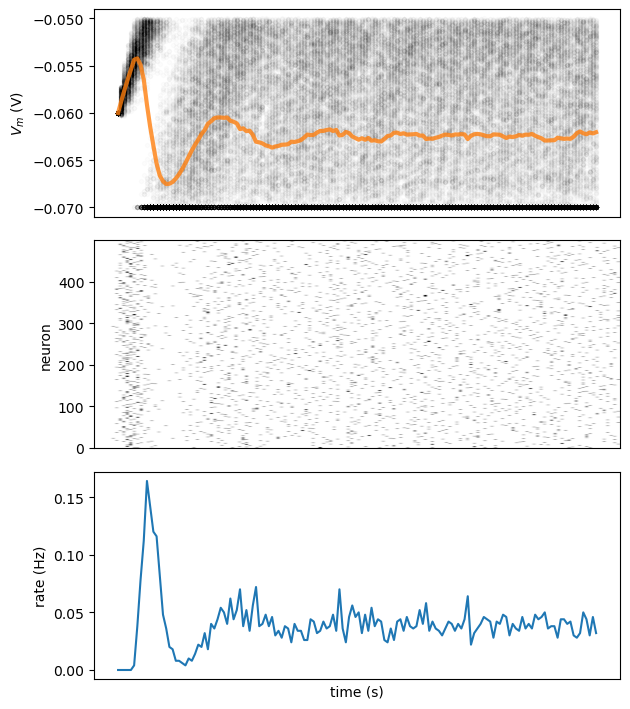

In [19]:
def ode_step(v, i, dt):
  """
  Evolves membrane potential by one step of discrete time integration

  Args:
    v (numpy array of floats)
      membrane potential at previous time step of shape (neurons)

    i (numpy array of floats)
      synaptic input at current time step of shape (neurons)

    dt (float)
      time step increment

  Returns:
    v (numpy array of floats)
      membrane potential at current time step of shape (neurons)
  """
  v = v + dt/tau * (el - v + r*i)

  return v


def spike_clamp(v, delta_spike):
  """
  Resets membrane potential of neurons if v>= vth
  and clamps to vr if interval of time since last spike < t_ref

  Args:
    v (numpy array of floats)
      membrane potential of shape (neurons)

    delta_spike (numpy array of floats)
      interval of time since last spike of shape (neurons)

  Returns:
    v (numpy array of floats)
      membrane potential of shape (neurons)
    spiked (numpy array of floats)
      boolean array of neurons that spiked  of shape (neurons)
  """

  ####################################################
  ## TODO for students: complete spike_clamp
  # Fill out function and remove
#   raise NotImplementedError("Student exercise: complete spike_clamp")
  ####################################################
  # Boolean array spiked indexes neurons with v>=vth
  spiked = v >= vth
  v[spiked] = vr

  # Boolean array clamped indexes refractory neurons
  clamped = delta_spike < t_ref 
  v[clamped] = vr

  return v, spiked


# Set random number generator
np.random.seed(2020)

# Initialize step_end, t_range, n, v_n and i
t_range = np.arange(0, t_max, dt)
step_end = len(t_range)
n = 500
v_n = el * np.ones([n, step_end])
i = i_mean * (1 + 0.1 * (t_max / dt)**(0.5) * (2 * np.random.random([n, step_end]) - 1))

# Initialize binary numpy array for raster plot
raster = np.zeros([n,step_end])

# Initialize t_ref and last_spike
mu = 0.01
sigma = 0.007
t_ref = mu + sigma*np.random.normal(size=n)
t_ref[t_ref<0] = 0
last_spike = -t_ref * np.ones([n])

# Loop over time steps
for step, t in enumerate(t_range):

  # Skip first iteration
  if step==0:
    continue

  # Compute v_n
  v_n[:,step] = ode_step(v_n[:,step-1], i[:,step], dt)

  # Reset membrane potential and clamp
  v_n[:,step], spiked = spike_clamp(v_n[:,step], t - last_spike)

  # Update raster and last_spike
  raster[spiked,step] = 1.
  last_spike[spiked] = t

# Plot multiple realizations of Vm, spikes and mean spike rate
plot_all(t_range, v_n, n, raster)

## Coding Exercise 7: Making a LIF class

Ran for 0.15s in 150 steps.


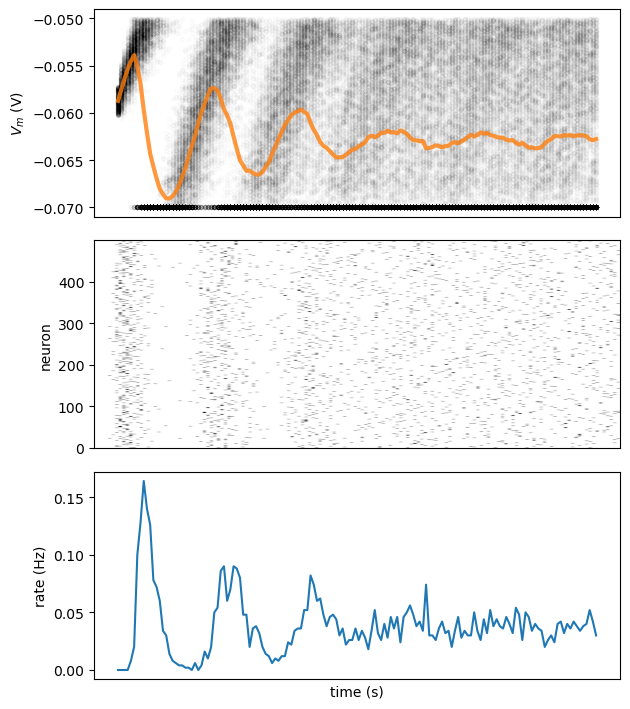

In [20]:
# Simulation class
class LIFNeurons:
  """
  Keeps track of membrane potential for multiple realizations of LIF neuron,
  and performs single step discrete time integration.
  """
  def __init__(self, n, t_ref_mu=0.01, t_ref_sigma=0.002,
               tau=20e-3, el=-60e-3, vr=-70e-3, vth=-50e-3, r=100e6):

    # Neuron count
    self.n = n

    # Neuron parameters
    self.tau = tau        # second
    self.el = el          # milivolt
    self.vr = vr          # milivolt
    self.vth = vth        # milivolt
    self.r = r            # ohm

    # Initializes refractory period distribution
    self.t_ref_mu = t_ref_mu
    self.t_ref_sigma = t_ref_sigma
    self.t_ref = self.t_ref_mu + self.t_ref_sigma * np.random.normal(size=self.n)
    self.t_ref[self.t_ref<0] = 0

    # State variables
    self.v = self.el * np.ones(self.n)
    self.spiked = self.v >= self.vth
    self.last_spike = -self.t_ref * np.ones([self.n])
    self.t = 0.
    self.steps = 0


  def ode_step(self, dt, i):

    # Update running time and steps
    self.t += dt
    self.steps += 1

    # One step of discrete time integration of dt
    self.v = self.v + dt / self.tau * (self.el - self.v + self.r * i)

    ####################################################
    ## TODO for students: complete the `ode_step` method
    # Fill out function and remove
    # raise NotImplementedError("Student exercise: complete the ode_step method")
    ####################################################

    # Spike and clamp
    self.spiked = self.v >= self.vth
    self.v[self.spiked] = self.vr
    self.last_spike[self.spiked] = self.t
    clamped = self.last_spike + self.t_ref > self.t
    self.v[clamped] = self.vr

    self.last_spike[self.spiked] = self.t 

# Set random number generator
np.random.seed(2020)

# Initialize step_end, t_range, n, v_n and i
t_range = np.arange(0, t_max, dt)
step_end = len(t_range)
n = 500
v_n = el * np.ones([n, step_end])
i = i_mean * (1 + 0.1 * (t_max / dt)**(0.5) * (2 * np.random.random([n, step_end]) - 1))

# Initialize binary numpy array for raster plot
raster = np.zeros([n,step_end])

# Initialize neurons
neurons = LIFNeurons(n)

# Loop over time steps
for step, t in enumerate(t_range):

  # Call ode_step method
  neurons.ode_step(dt, i[:,step])

  # Log v_n and spike history
  v_n[:,step] = neurons.v
  raster[neurons.spiked, step] = 1.

# Report running time and steps
print(f'Ran for {neurons.t:.3}s in {neurons.steps} steps.')

# Plot multiple realizations of Vm, spikes and mean spike rate
plot_all(t_range, v_n, n, raster)